In [1]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 7.1 MB/s 
     |████████████████████████████████| 675 kB 46.8 MB/s 
     |████████████████████████████████| 58 kB 7.6 MB/s 
     |████████████████████████████████| 4.7 MB 49.6 MB/s 
     |████████████████████████████████| 812 kB 53.8 MB/s 
     |████████████████████████████████| 28.5 MB 50 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=f5a4acaa8376886de676826e8229de8825f2d88ff193c38ebdbd97c0f75630ae
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=805576fd63445137ac3bbc82993b7b16bf9880992d0d24fa7db19c9fd5e6b507
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# load the dataset
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
ProfileReport(dataset)

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# ganti yang kosong dengan np.nan
dataset['TotalCharges'] = dataset['TotalCharges'].replace(' ', np.nan)
dataset['TotalCharges'] = dataset['TotalCharges'].astype('float64')
# konversi ke float64
dataset['SeniorCitizen'] = dataset['SeniorCitizen'].astype('object')
dataset = dataset.drop(dataset.columns[0], axis=1)


In [7]:
dataset.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [8]:
#menangani missing value
tenure = (dataset.tenure == 0).sum()
print("Nilai 0 di kolom tenure ada: ", tenure)

Nilai 0 di kolom tenure ada:  11


In [9]:
# cek kolom tenure yg terdapat nilai 0
dataset.loc[(dataset['tenure']==0)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
#mengambil dataset dengan kolom tenure bukan 0
dataset = dataset.loc[(dataset['tenure']!=0)]
dataset.shape

(7032, 20)

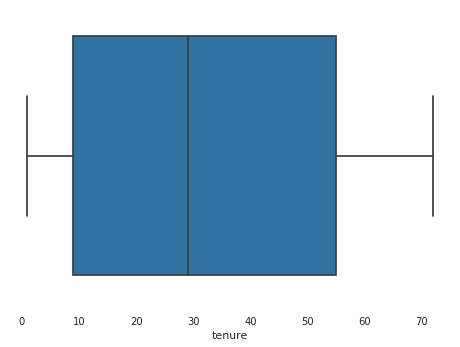

In [11]:
#visualisasikan kolom apakah terdapat outlier
sns.boxplot(x=dataset['tenure'])

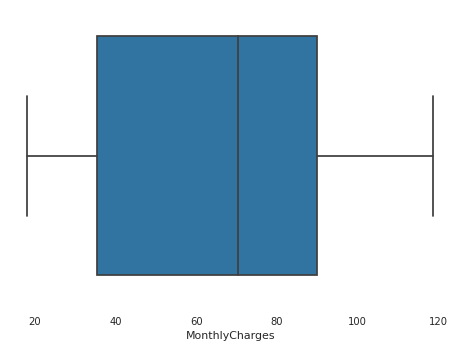

In [12]:
#visualisasikan kolom apakah terdapat outlier
sns.boxplot(x=dataset['MonthlyCharges'])

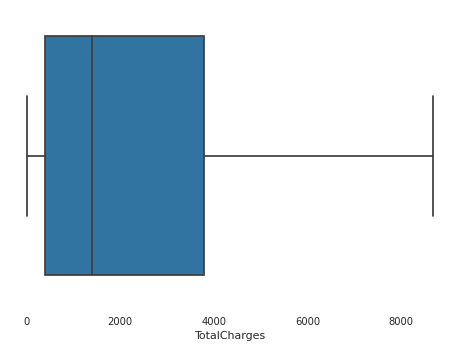

In [13]:
#visualisasikan kolom apakah terdapat outlier
sns.boxplot(x=dataset['TotalCharges'])

In [14]:
# analisis univariat
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']

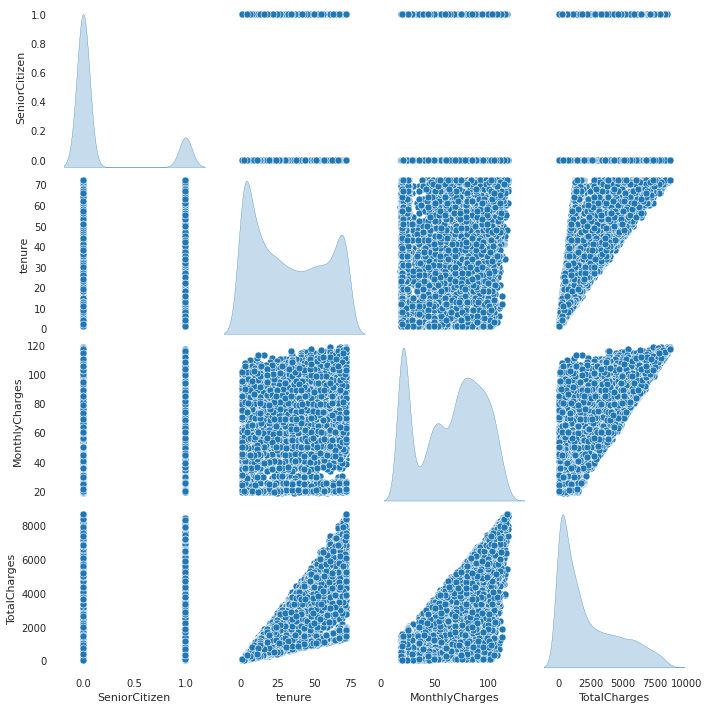

In [15]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(dataset, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

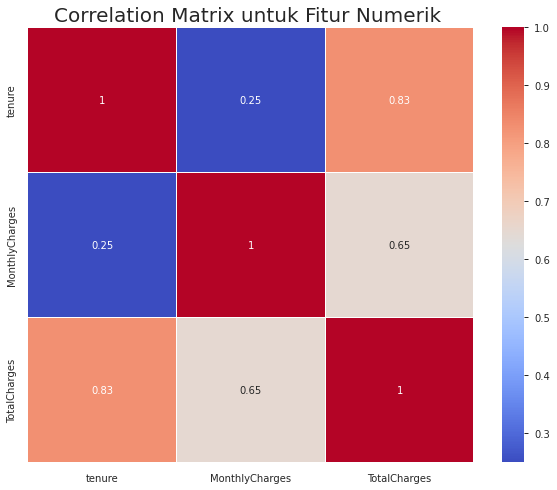

In [16]:
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [17]:
#konversi semua kolom bertipe categorical ke numerik
for column in dataset.columns:
	if dataset[column].dtype == np.number: continue
	# menerapkan label encoding untuk kolom bertipe categorical
	dataset[column] = LabelEncoder().fit_transform(dataset[column])
print(dataset.describe())

            gender  SeniorCitizen  ...  TotalCharges        Churn
count  7032.000000    7032.000000  ...   7032.000000  7032.000000
mean      0.504693       0.162400  ...   2283.300441     0.265785
std       0.500014       0.368844  ...   2266.771362     0.441782
min       0.000000       0.000000  ...     18.800000     0.000000
25%       0.000000       0.000000  ...    401.450000     0.000000
50%       1.000000       0.000000  ...   1397.475000     0.000000
75%       1.000000       0.000000  ...   3794.737500     1.000000
max       1.000000       1.000000  ...   8684.800000     1.000000

[8 rows x 20 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
dataset.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
#membagi data menjadi data train dan databtest
X = dataset.drop(["Churn"],axis =1)
y = dataset["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15102021)

In [20]:
#mengecek isi kolom
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 7032
Total # of sample in train dataset: 5625
Total # of sample in test dataset: 1407


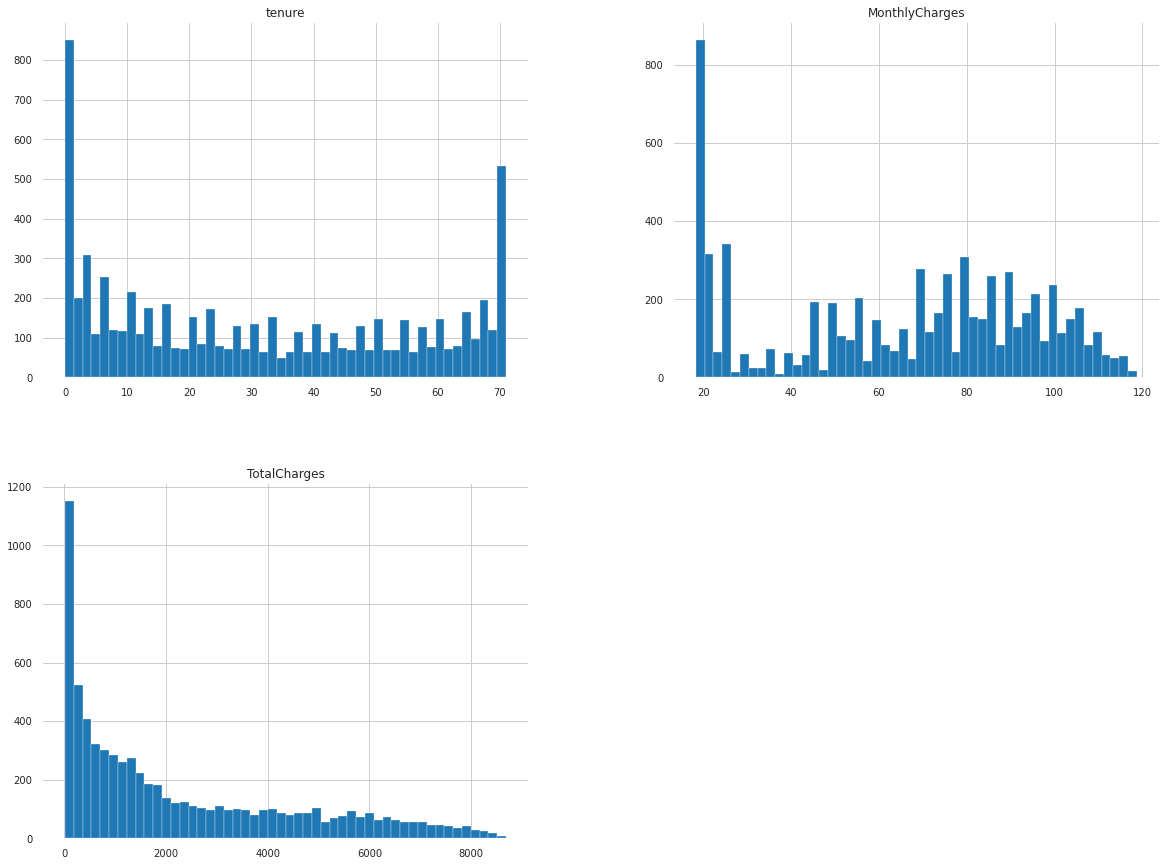

In [21]:
#mengecek distribusi data 
dataset[numerical_features].hist(bins=50, figsize=(20,15))
plt.show()

In [22]:
#mengecek persentase data churn
print('Jumlah baris dan kolom dari x_train:', X_train.shape,'\nJumlah baris dan kolom dari y_train:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(pd.Series(y_train).value_counts(normalize=True))

Jumlah baris dan kolom dari x_train: (5625, 19) 
Jumlah baris dan kolom dari y_train: (5625,)
Prosentase Churn di data Training adalah:
0    0.731733
1    0.268267
Name: Churn, dtype: float64


In [23]:
#menangani imbalance data
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 4116, 1: 4116})
Testing target statistics: Counter({0: 1047, 1: 360})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [24]:
#cek proporsi isi churn setelah di treatment 
print('Jumlah baris dan kolom dari x_train:', X_res.shape,'\nJumlah baris dan kolom dari y_train:', y_res.shape)
print('Prosentase Churn di data Training adalah:')
print(pd.Series(y_res).value_counts(normalize=True))

Jumlah baris dan kolom dari x_train: (8232, 19) 
Jumlah baris dan kolom dari y_train: (8232,)
Prosentase Churn di data Training adalah:
1    0.5
0    0.5
dtype: float64


In [25]:
#normalisasi data dengan standar scaller
scaler = StandardScaler()
scaler.fit(X_res)
X_res = scaler.transform(X_res) 
X_test = scaler.transform(X_test)
print(X_res)
print(X_test)

[[ 1.01173061 -0.49441323 -0.88551411 ... -0.61531058  1.69879081
   2.73479716]
 [ 1.01173061  2.02259959  1.12928748 ... -1.59637521  0.40950309
  -0.77591266]
 [ 1.01173061 -0.49441323  1.12928748 ... -1.59637521 -1.66787472
  -0.60149537]
 ...
 [-0.98840541 -0.49441323 -0.88551411 ...  1.34681868  0.6013408
  -0.89389478]
 [-0.98840541 -0.49441323 -0.88551411 ...  0.36575405  0.93662474
  -0.84302782]
 [-0.98840541 -0.49441323  1.12928748 ...  1.34681868  0.04656686
  -0.90122017]]
[[ 1.01173061 -0.49441323  1.12928748 ...  0.36575405  1.49139868
   0.12465379]
 [ 1.01173061 -0.49441323  1.12928748 ... -0.61531058 -0.62054448
  -0.51735609]
 [ 1.01173061 -0.49441323 -0.88551411 ...  0.36575405 -0.41142408
  -0.79987421]
 ...
 [ 1.01173061 -0.49441323 -0.88551411 ...  1.34681868 -1.63330937
  -0.72285493]
 [ 1.01173061 -0.49441323  1.12928748 ...  1.34681868 -1.68342913
  -0.80562498]
 [-0.98840541 -0.49441323  1.12928748 ...  0.36575405 -0.82966487
  -0.71212928]]


In [26]:
#model selection dengan Logistic Regression standard
LR = LogisticRegression()
LR.fit(X_res, y_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
#model selection dengan Gradient Boosting Classifier standard
gbc = GradientBoostingClassifier()
gbc.fit(X_res, y_res)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [28]:
#model selection dengan Random Forest Classifier standard
rfc = RandomForestClassifier()
rfc.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
#Cek akurasi train dan test
mse = pd.DataFrame(columns=['train', 'test'], index=['Gradient Boosting Classifie', 'Logistic Regression', 'Random Forest Classifier'])
model_dict = {'Gradient Boosting Classifie': gbc, 'Logistic Regression': LR, 'Random Forest Classifier': rfc}
  
for name, model in model_dict.items():
    mse.loc[name, 'train'] = model.score(X_res, y_res)*100
    mse.loc[name, 'test'] = model.score(X_test, y_test)*100
 
mse

,train,test
Gradient Boosting Classifie,80.9281,76.0483
Logistic Regression,76.8586,74.769
Random Forest Classifier,99.757,79.3177


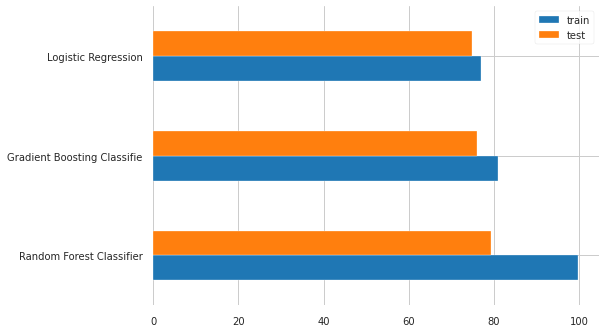

In [30]:
#visualisasikan akurasi model 
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [31]:
#memilih model RFC, kemudian cek precision,recall, f1-score dan support nya
# Predict
y_test_pred = rfc.predict(X_test)
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1047
           1       0.60      0.57      0.58       360

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



In [32]:
#tuning model RFC
rfc_tuned = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=11, max_features='log2',
                       min_impurity_decrease=0.001,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       verbose=0)
rfc_tuned.fit(X_res,y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=11, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
# Predict
y_test_pred = rfc_tuned.predict(X_test)
# Print classification report
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1047
           1       0.52      0.78      0.62       360

    accuracy                           0.76      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.81      0.76      0.77      1407



In [34]:
confusion_matrix_tuned = pd.DataFrame((confusion_matrix(y_test, rfc_tuned.predict(X_test))), ('No churn', 'Churn'), ('No churn', 'Churn'))
confusion_matrix_tuned

,No churn,Churn
No churn,785,262
Churn,80,280


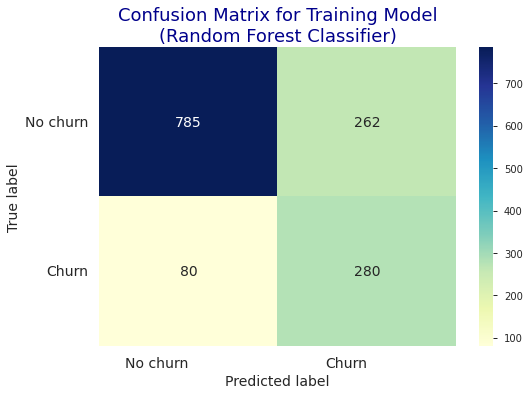

In [35]:
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_tuned, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest Classifier)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()